In [87]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()
bk = Aer.get_backend("qasm_simulator") # Use QASM Simulator for backend

### Answer to task 1
Usage: <br>
    `final_quantum_circuit = qram(vector=[vector]).main()`

In [88]:
class qram(object):
    
    """Returns a quantum circuit for the targets solutions
    
    Note:
        This is a 2 qubit implementation, it won't work on 2 ^ N qubits
        
        Target Solutions:
            They are the indices of binary numbers where two 
            adjacent bits will always have different values.

    Args:
        vector (list[int]): Vector of Numbers

    Attributes:
        main (self): Returns quantum circuit for superposition of targets indices 
        oracle (self): Stores the Quantum Circuit in self.circ
    """


    def __init__(self, vector:list=[]):
        """
        Initializes:
            self.vector list[int]: Vector Of Numbers
            self.binary_vector list[str]: Binary instance of self.vector
            self.indices list: Indices of the targets
            self.zfill int: length of the longest binary number
            self.circ QuantumCircuit: The Final Quantum Circuit
        """
        
        self.vector = vector
        self.binary_vector = []
        self.indices = []      
        self.zfill: int = None 
        self.circ = None       
    
    
    def main(self) -> 'QuantumCiurcuit':
        """
        Return:
            Quantum circuit for superposition of targets indices
        """
        
        temp = []
        
        # Find the zfill
        
        for num in self.vector:
            temp.append(str(bin(num)).replace("0b", ""))
        self.zfill = len(max(temp, key=len))

        # convert to binary
        
        for num in self.vector:
            binary = bin(num)[2:].zfill(self.zfill)
            self.binary_vector.append(binary)


        # find target indices
        
        if self.zfill == 4:
            for num in self.binary_vector:
                if num[0] == num[2] and num[1] == num[3]:
                        self.indices.append(self.binary_vector.index(num))
        elif self.zfill == 3:
            for num in self.binary_vector:
                if num[0] == num[2] and num[0] != num[1]:
                    self.indices.append(self.binary_vector.index(num))
        else:
            for num in binary_vector:
                if num[0] != num[1]:
                    self.indices.append(self.binary_vector.index(num))
                    
        self.oracle()
        return self.circ
    
    def oracle(self) -> None:
        """
        Stores the Quantum Circuit in self.circ
        """
        
        circ = QuantumCircuit(2, 2) # inittialize 2 qubit quantum circuit
        indices = self.indices
        
        # Add the required gates according for the indices
        
        if indices == [0, 1] or indices == [1, 0]:
            circ.h(0)

        elif indices == [0, 2] or indices == [2, 0]:
            circ.h(1)

        elif indices == [0, 3] or indices == [3, 0]:
            circ.h(0)
            circ.cx(0, 1)

        elif indices == [1, 2] or indices == [2, 1]:
            circ.h(1)
            circ.cx(1, 0)
            circ.x(0)

        elif indices == [1, 3] or indices == [3, 1]:
            circ.x(0)
            circ.h(1)


        elif indices == [2, 3] or indices == [3, 2]:
            circ.h(0)
            circ.x(1)
        self.circ = circ
        
        return

##### Test 1
`vector = [1,5,7,10]`

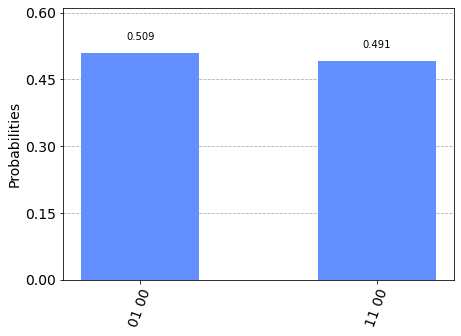

In [91]:
test1 = qram(vector=[1,5,7,10]).main()

test1.measure_all() # measure all the qubits
plot_histogram(execute(test1, bk).result().get_counts(test1)) # get result and plot the graph

##### Test 2
`vector = [1,5,4,2]`

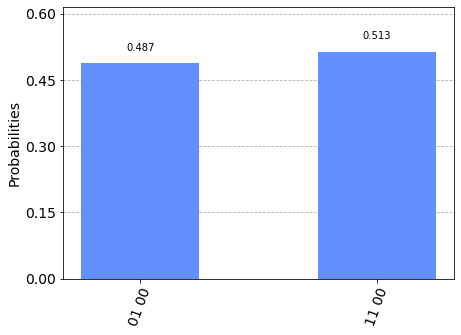

In [93]:
test2 = qram(vector=[1,5,4,2]).main()

test2.measure_all() # measure all the qubits
plot_histogram(execute(test2, bk).result().get_counts(test2)) # mesaure all the qubits